In [1]:
install.packages("twitteR", repos = "https://cran.r-project.org/")
install.packages("ROAuth", repos = "https://cran.r-project.org/")

Installing package into 'C:/Users/User/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'twitteR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmp0oG2qj\downloaded_packages


Installing package into 'C:/Users/User/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'ROAuth' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmp0oG2qj\downloaded_packages


In [15]:
library(twitteR)
library(ROAuth)

Add twitter libraries to extract tweets

In [16]:
consumer_key <- "BKro8XRNa8BqG7dl5kkfRNzAx"
consumer_secret <- "FAhRriPzc5jkEJX8LdzqDpDxzg1LDgXwwKU8nq8154RvAIpnQu"
access_token <- "772574727051370496-aM0inDDiZEow8fHaVBXHKV1uDiBtKeA"
access_secret <- "eIOajp1GUa0yR1sBXCIqEVHM7VJCo0c1dSGp6YoZHCm4J"
setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)

[1] "Using direct authentication"


In [28]:
tweets <- searchTwitter('#ChampionsLeague', n=10000)
tweets <- strip_retweets(tweets, strip_manual=TRUE, strip_mt=TRUE)

[1] "Rate limited .... blocking for a minute and retrying up to 119 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 118 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 117 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 116 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 115 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 114 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 113 times ..."
[1] "Rate limited .... blocking for a minute and retrying up to 112 times ..."


Tweets are searched based on a hashtag related to football.

In [29]:
df <- twListToDF(tweets)
nrow(df)
df$text <- sapply(df$text,function(row) iconv(row, "latin1", "ASCII", sub=""))


[1] 5562

In [30]:
write.table(df$text,"TweetOutput5.txt",sep="\n",,row.names=F,col.names=F,quote=F,fileEncoding="UTF-8")

Every set of extracted tweets is added to a different file. A total of 5 files is created as input to the mapreduce code.

In [5]:
install.packages("wordcloud", repos = "https://cran.r-project.org/", dependencies = TRUE)
install.packages("RColorBrewer", repos = "https://cran.r-project.org/", dependencies = TRUE)

Installing package into 'C:/Users/User/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
also installing the dependencies 'NLP', 'slam', 'tm'



package 'NLP' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'tm' successfully unpacked and MD5 sums checked
package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpwpYMw8\downloaded_packages


Installing package into 'C:/Users/User/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
Warning message:
"package 'RColorBrewer' is in use and will not be installed"

In [6]:
library(wordcloud)
library(RColorBrewer)

Warning message:
"package 'wordcloud' was built under R version 3.3.3"

Add libraries for wordcloud

In [8]:
tweetWords <- read.table("WordCountOutput.txt")

V1,V2
0,1
02,1
1,6
10,2
1001gags,1
102,2


Read from the map reduce word count output file

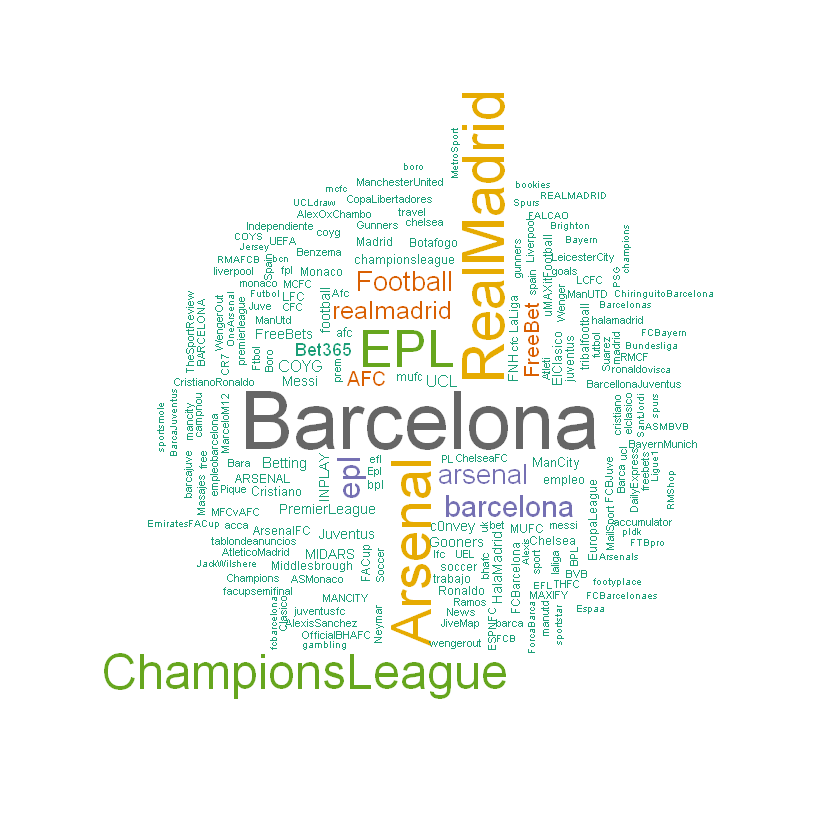

In [7]:
wordcloud(words = tweetWords$V1, freq = tweetWords$V2, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))